In [9]:
from pandas.plotting import parallel_coordinates
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../data/Diabetes_Tarea2.csv")

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**A - Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.**

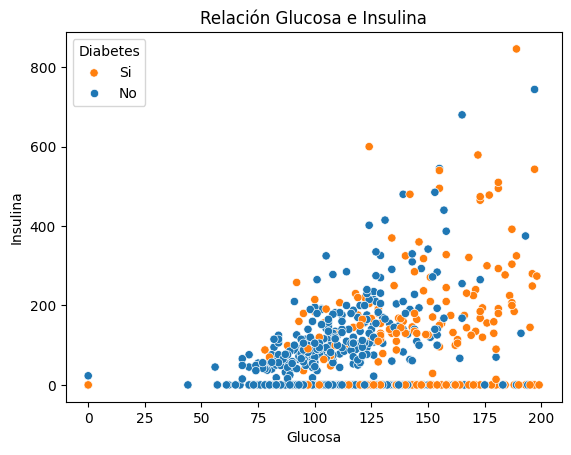

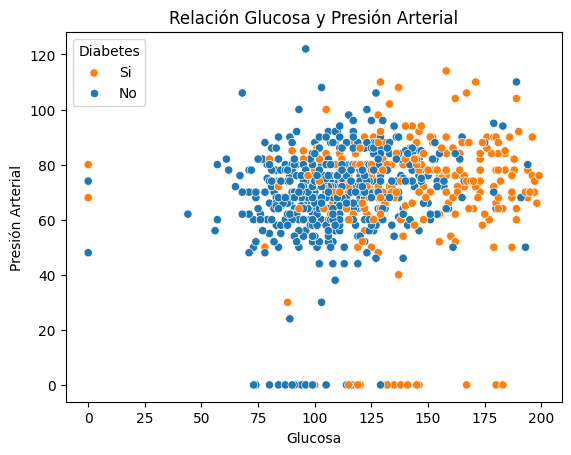

In [11]:
#Insulina
#plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome')
plt.title('Relación Glucosa e Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.show()

# Presión Arterial
#plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Glucose', y='BloodPressure', hue='Outcome')
plt.title('Relación Glucosa y Presión Arterial')
plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.show()


**B - Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).**

In [12]:
df["total_age_quantils"] = pd.qcut(df['Age'], q=4, labels=["Joven", "Adulto", "Adulto Joven","Tercera Edad"])
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,total_age_quantils
0,6,148,72,35,0,33.6,0.627,50,1,Tercera Edad
1,1,85,66,29,0,26.6,0.351,31,0,Adulto Joven
2,8,183,64,0,0,23.3,0.672,32,1,Adulto Joven
3,1,89,66,23,94,28.1,0.167,21,0,Joven
4,0,137,40,35,168,43.1,2.288,33,1,Adulto Joven


In [13]:
#Con este hanndle fijo el color para el boxplot
handles = [
    Patch(color=sns.color_palette()[0], label='No'), 
    Patch(color=sns.color_palette()[1], label='Si') 
]


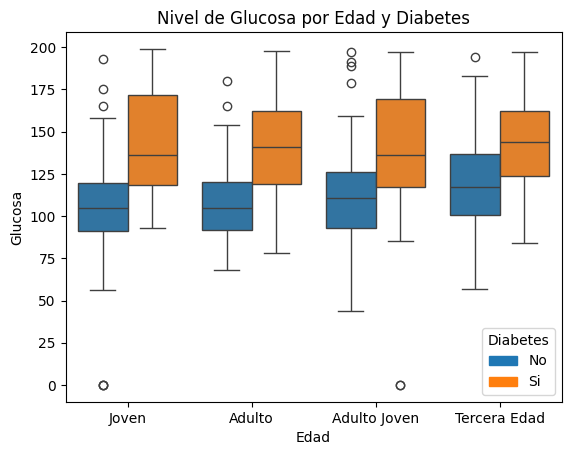

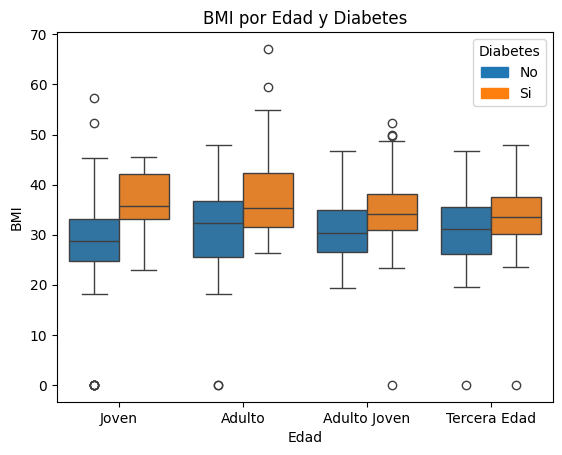

In [14]:
#Glucosa
#plt.figure(figsize=(8, 6))
sns.boxplot(x='total_age_quantils', y='Glucose', hue='Outcome', data=df)
plt.title('Nivel de Glucosa por Edad y Diabetes')
plt.xlabel('Edad')
plt.ylabel('Glucosa')
plt.legend(title='Diabetes', handles=handles)
plt.show()

#BMI
#plt.figure(figsize=(8, 6))
sns.boxplot(x='total_age_quantils', y='BMI', hue='Outcome', data=df)
plt.title('BMI por Edad y Diabetes')
plt.xlabel('Edad')
plt.ylabel('BMI')
plt.legend(title='Diabetes', handles=handles)
plt.show()


**C - Dos diagramas de violín con las mismas separaciones anteriores, esta vez mostrando los datos de insulina y espesor de la piel.**

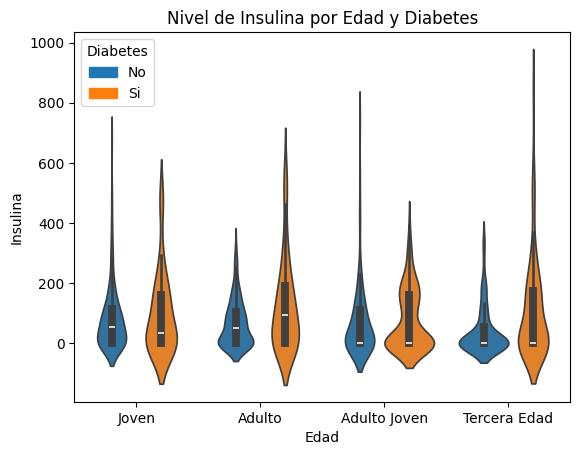

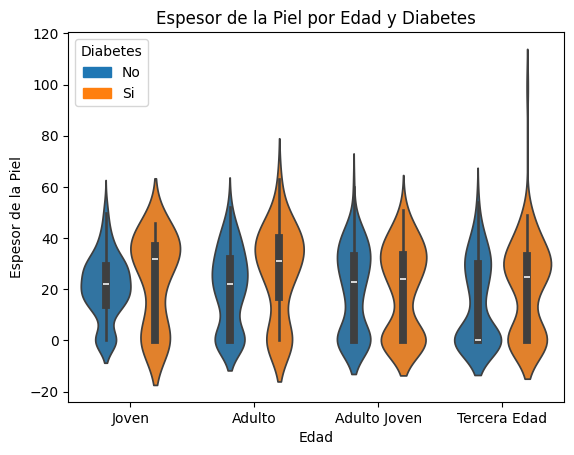

In [17]:
#Insulina
sns.violinplot(x='total_age_quantils', y='Insulin', hue='Outcome', data=df)
plt.title('Nivel de Insulina por Edad y Diabetes')
plt.xlabel('Edad')
plt.ylabel('Insulina')
plt.legend(title='Diabetes', handles=handles)
plt.show()

#Espesor de la piel
sns.violinplot(x='total_age_quantils', y='SkinThickness', hue='Outcome', data=df)
plt.title('Espesor de la Piel por Edad y Diabetes')
plt.xlabel('Edad')
plt.ylabel('Espesor de la Piel')
plt.legend(title='Diabetes', handles=handles)
plt.show()


**D - Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.**

In [8]:
# Grupos de Pacientes
labels = ['21-30', '31-40', '41-50', '51-60', '+61']
df['AgeGroup'] = pd.cut(df['Age'], bins= [20, 30, 40, 50, 60, 80], labels=labels, right=False)
counting = df['AgeGroup'].value_counts()
counting

AgeGroup
21-30    396
31-40    165
41-50    118
51-60     57
+61       31
Name: count, dtype: int64

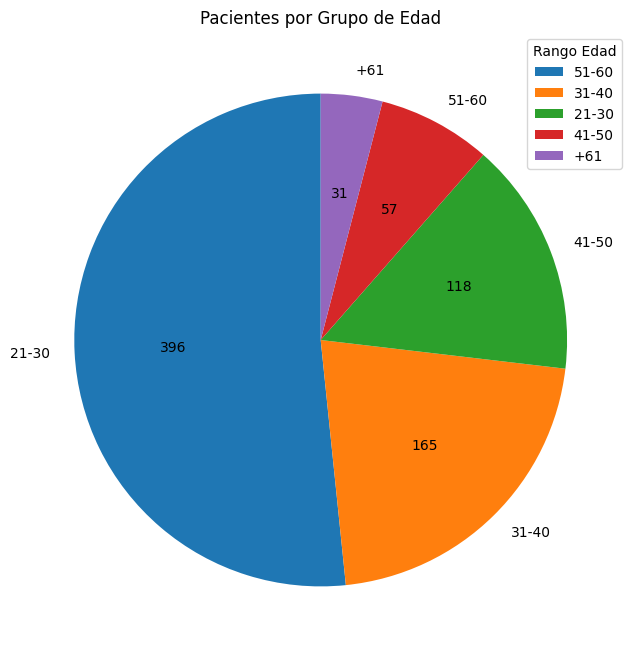

In [9]:
# Diagrama de torta
plt.figure(figsize=(8, 8))
plt.pie(counting, labels=counting.index, autopct= lambda x: "{:.0f}".format(x * (counting.sum() / 100)), startangle=90)
plt.title('Pacientes por Grupo de Edad')
intervals = df['AgeGroup'].unique()
plt.legend(labels=intervals, title='Rango Edad')
plt.show()

**E - Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes.**

In [10]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,total_age_quantils,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Tercera Edad,51-60
1,1,85,66,29,0,26.6,0.351,31,0,Adulto Joven,31-40
2,8,183,64,0,0,23.3,0.672,32,1,Adulto Joven,31-40
3,1,89,66,23,94,28.1,0.167,21,0,Joven,21-30
4,0,137,40,35,168,43.1,2.288,33,1,Adulto Joven,31-40


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'total_age_quantils', 'AgeGroup'],
      dtype='object')

In [12]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

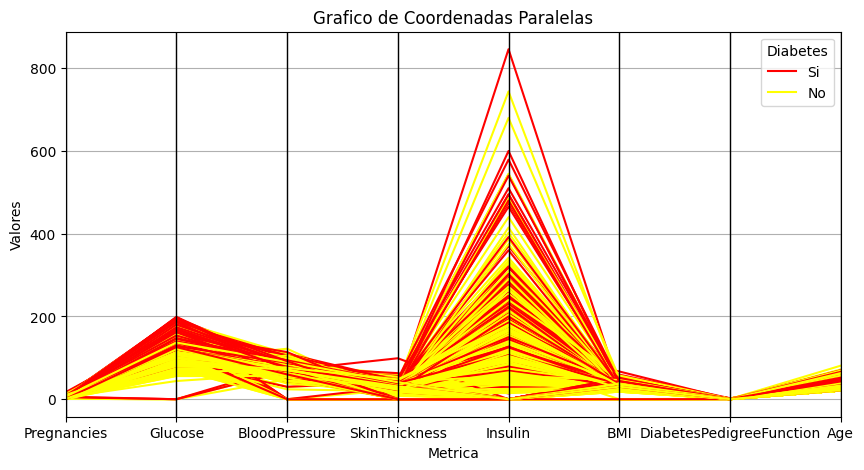

In [13]:
plt.figure(figsize=(10, 5))
parallel_coordinates(df, "Outcome", cols=columns, color = ["red", "yellow"])
plt.title("Grafico de Coordenadas Paralelas")
plt.xlabel('Metrica')
plt.ylabel('Valores')
plt.legend(title='Diabetes', labels=['Si', 'No'])
plt.show()